In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

import pickle

In [3]:
df = pd.read_csv('../data/employee.csv')
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df.shape

(1470, 35)

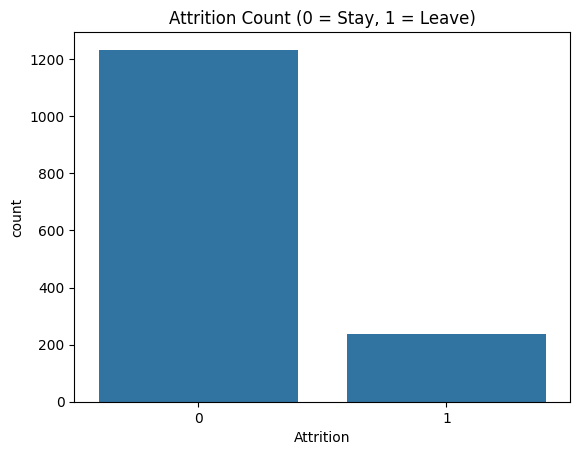

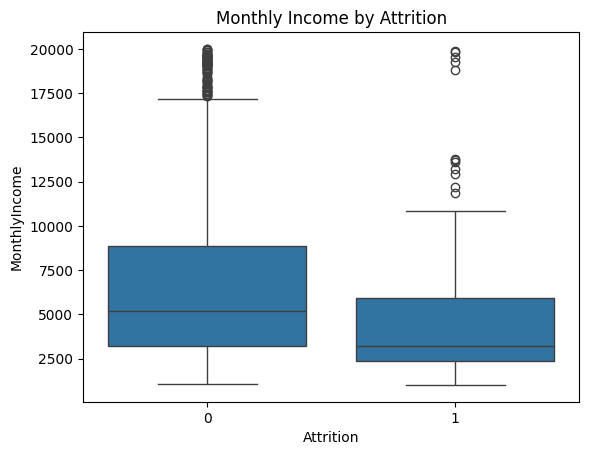

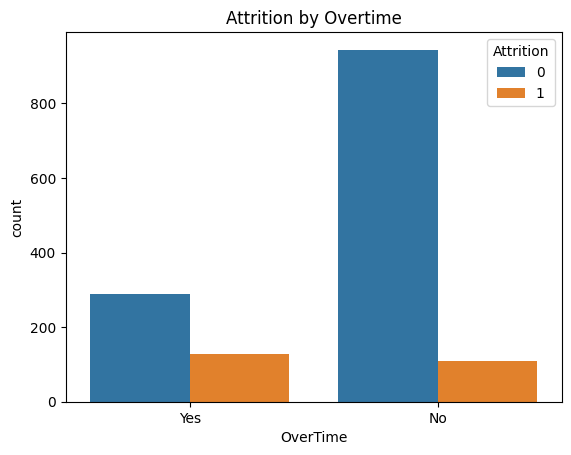

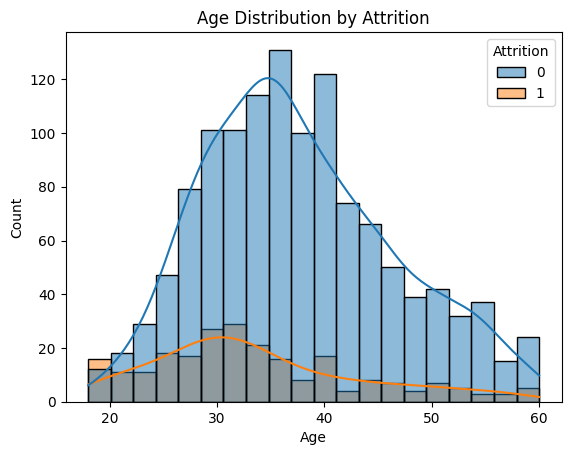

In [4]:
# Attrition Count
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count (0 = Stay, 1 = Leave)")
plt.show()

# Monthly Income by Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

# Attrition by Overtime
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by Overtime")
plt.show()

# Age Distribution by Attrition
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title("Age Distribution by Attrition")
plt.show()

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [6]:
rf = RandomForestClassifier(random_state=43)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_10_features = importances.sort_values(ascending=False).head(10).index.tolist()
print("Top 10 features:", top_10_features)

Top 10 features: ['MonthlyIncome', 'Age', 'TotalWorkingYears', 'OverTime_Yes', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'EmployeeNumber', 'DistanceFromHome', 'YearsAtCompany']


In [7]:
X_top = X[top_10_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

sm = SMOTE(random_state=43)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=43
)

In [9]:
model = LogisticRegression(max_iter=3000, solver='saga', random_state=43)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=43, solver='saga')

In [10]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       232
           1       0.72      0.70      0.71       262

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494



In [11]:
with open('../models/attrition_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../models/model_features.pkl', 'wb') as f:
    pickle.dump(top_10_features, f)